<a href="https://colab.research.google.com/github/mahima0811gupta/NLP-PYTHON/blob/main/MAYUR_VIHAR_ANALYSIS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

In [137]:
data = pd.read_csv('/content/Mayur Vihar anganwadi Ghaziabad f1.csv')

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Domain     12 non-null     object
 1   Task       12 non-null     object
 2   AGE Group  12 non-null     object
 3   TRIAL1     12 non-null     int64 
 4   TRIAL2     12 non-null     int64 
 5   TRIAL3     12 non-null     int64 
 6   TRIAL4     12 non-null     int64 
 7   TRIAL5     12 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 896.0+ bytes


In [139]:
data.describe()

,TRIAL1,TRIAL2,TRIAL3,TRIAL4,TRIAL5
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.916667,0.750000,0.833333,0.833333,0.916667
std,0.288675,0.452267,0.389249,0.389249,0.288675
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.750000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
data.head()

,Domain,Task,AGE Group,TRIAL1,TRIAL2,TRIAL3,TRIAL4,TRIAL5
0,Aesthetic,Egg Farm,4-5,0,0,0,1,1
1,Aesthetic,Ege Farm,5-6,1,0,1,1,1
2,Aesthetic,Ege Farm,3-4,1,0,0,0,0
3,Aesthetic,Pattern,4-5,1,1,1,1,1
4,Aesthetic,Pattern,5-6,1,1,1,1,1


In [141]:
data.tail()

,Domain,Task,AGE Group,TRIAL1,TRIAL2,TRIAL3,TRIAL4,TRIAL5
7,Aesthetic,Shadow,5-6,1,1,1,0,1
8,Aesthetic,Shadow,3-4,1,1,1,1,1
9,Aesthetic,Habitate,4-5,1,1,1,1,1
10,Aesthetic,Habitate,5-6,1,1,1,1,1
11,Aesthetic,Habitate,3-4,1,1,1,1,1


In [142]:

scaled_trials = data[['TRIAL1', 'TRIAL2', 'TRIAL3', 'TRIAL4', 'TRIAL5']]
data['Average_Score'] = scaled_trials.mean(axis=1)
grouped_scores = data.groupby(['AGE Group', 'Task'])['Average_Score'].mean().reset_index()

grouped_scores


,AGE Group,Task,Average_Score
0,3-4,Ege Farm,0.2
1,3-4,Habitate,1.0
2,3-4,Pattern,1.0
3,3-4,Shadow,1.0
4,4-5,Egg Farm,0.4
5,4-5,Habitate,1.0
6,4-5,Pattern,1.0
7,4-5,Shadow,1.0
8,5-6,Ege Farm,0.8
9,5-6,Habitate,1.0


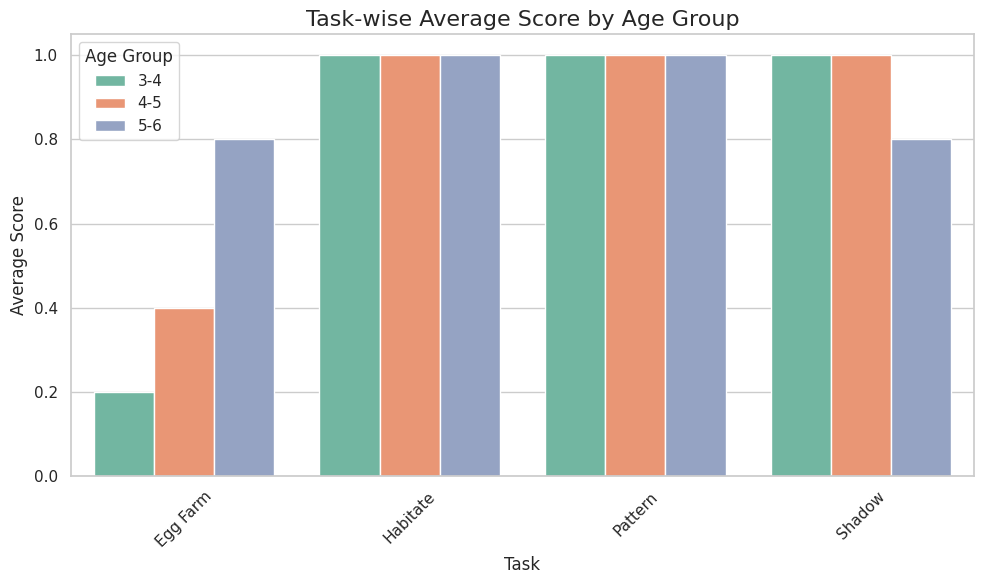

In [143]:

data = {
    "AGE Group": ["3-4", "3-4", "3-4", "3-4", "4-5", "4-5", "4-5", "4-5", "5-6", "5-6", "5-6", "5-6"],
    "Task": ["Egg Farm", "Habitate", "Pattern", "Shadow", "Egg Farm", "Habitate", "Pattern", "Shadow", "Egg Farm", "Habitate", "Pattern", "Shadow"],
    "Average_Score": [0.2, 1.0, 1.0, 1.0, 0.4, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 0.8],
}
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Task", y="Average_Score", hue="AGE Group", palette="Set2")
plt.title("Task-wise Average Score by Age Group", fontsize=16)
plt.xlabel("Task", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.legend(title="Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [144]:
import pandas as pd
import plotly.express as px

data = {
    "AGE Group": ["3-4", "3-4", "3-4", "3-4", "4-5", "4-5", "4-5", "4-5", "5-6", "5-6", "5-6", "5-6"],
    "Task": ["Egg Farm", "Habitate", "Pattern", "Shadow", "Egg Farm", "Habitate", "Pattern", "Shadow", "Egg Farm", "Habitate", "Pattern", "Shadow"],
    "Average_Score": [0.2, 1.0, 1.0, 1.0, 0.4, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 0.8],
}
df = pd.DataFrame(data)

fig = px.box(
    df,
    x="AGE Group",
    y="Average_Score",
    color="AGE Group",
    title="Box Plot of Average Scores by Age Group",
    labels={"AGE Group": "Age Group", "Average_Score": "Average Score"},
    width=800,
    height=500
)
fig.show()
